In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader as pdr

In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf

df = yf.download('AAPL', start='2020-01-01', end='2025-01-01')


[*********************100%%**********************]  1 of 1 completed


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-16,223.919998,226.830002,223.649994,226.050003,226.050003,44340200
2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800
2024-08-20,225.770004,227.169998,225.449997,226.509995,226.509995,30299000
2024-08-21,226.520004,227.979996,225.050003,226.399994,226.399994,34765500
2024-08-22,227.789993,228.339996,223.899994,224.529999,224.529999,43665900


In [8]:
df.to_csv('AAPL.csv')

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv('AAPL.csv')

In [11]:
df1=df.reset_index()['Close']

In [12]:
df1.shape

(1168,)

In [13]:
df1

0        75.087502
1        74.357498
2        74.949997
3        74.597504
4        75.797501
           ...    
1163    226.050003
1164    225.889999
1165    226.509995
1166    226.399994
1167    224.529999
Name: Close, Length: 1168, dtype: float64

In [14]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


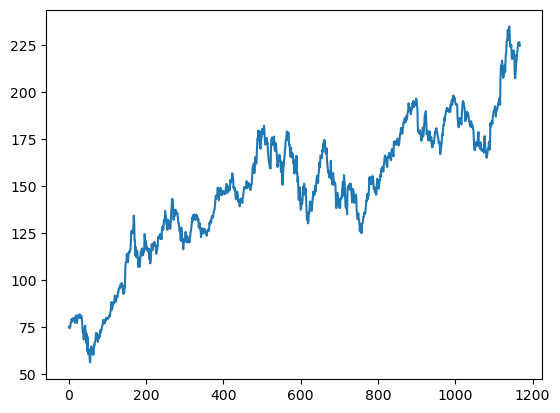

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
import numpy as np

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1

array([[0.10627912],
       [0.10219467],
       [0.10550977],
       ...,
       [0.95350457],
       [0.9528891 ],
       [0.94242627]])

In [20]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
training_size,test_size

(759, 409)

In [35]:
import numpy

def create_dataset(dataset,time_step=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)
        


In [37]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [43]:
print(x_train.shape),print(y_train.shape)

(658, 100)
(658,)


(None, None)

In [45]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [49]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\Pujan\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - loss: 0.1346 - val_loss: 0.0175
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - loss: 0.0090 - val_loss: 0.0130
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - loss: 0.0046 - val_loss: 0.0273
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0037 - val_loss: 0.0101
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0030 - val_loss: 0.0128
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 0.0024 - val_loss: 0.0126
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 0.0022 - val_loss: 0.0071
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - loss: 0.0019 - val_loss: 0.0056
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - loss: 0.0018 - val_loss: 0.0048
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 

In [58]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [60]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [64]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

139.65622567621878

In [66]:
math.sqrt(mean_squared_error(y_test,test_predict))

185.44712228693967

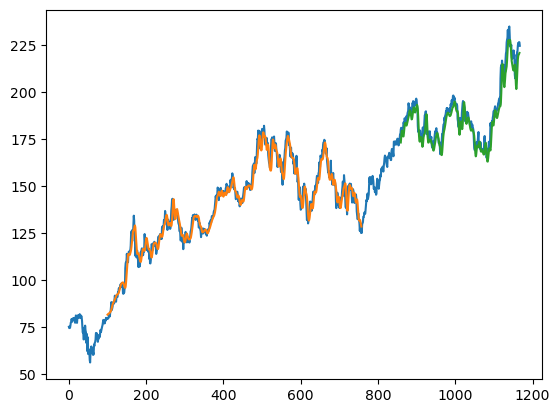

In [68]:
look_back=100
train_predict_plot=numpy.empty_like(df1)
train_predict_plot[:,:]=np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :]=train_predict

test_predict_plot=numpy.empty_like(df1)
test_predict_plot[:,:]=numpy.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [70]:
len(test_data)

409

In [72]:
x_input=test_data[309:].reshape(1,-1)
x_input.shape

(1, 100)

In [74]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [76]:
temp_input

[0.6308346066954515,
 0.635366631816756,
 0.6307227659730322,
 0.6349750185390938,
 0.6286525173639125,
 0.6354785579137727,
 0.6249038041725298,
 0.6655242691806412,
 0.673972939326152,
 0.652375812830197,
 0.6338560136927194,
 0.6261347351159208,
 0.6207633923288876,
 0.6093494062965131,
 0.6140492778760439,
 0.6199800803989657,
 0.6318417708194066,
 0.6367094888571637,
 0.6334083946792501,
 0.6569078379515014,
 0.6391713507439457,
 0.6334083946792501,
 0.6542781296064931,
 0.7121875481832883,
 0.7028437253854364,
 0.7067042792992387,
 0.7086066814501321,
 0.7188457422749223,
 0.7103411517682018,
 0.72841333189221,
 0.7348476737898108,
 0.7476605225983998,
 0.748331908431305,
 0.7484997548895312,
 0.7550460228841486,
 0.7623756881832847,
 0.7542627109542269,
 0.7317704318059305,
 0.7491152203612267,
 0.7491712260970339,
 0.7508496906792966,
 0.7564448002857659,
 0.7618161430727991,
 0.7717754313423465,
 0.7735659073962232,
 0.7820704125283465,
 0.7742932135903381,
 0.7877774482318324

In [84]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.9276102]
101
1 day input [0.63536663 0.63072277 0.63497502 0.62865252 0.63547856 0.6249038
 0.66552427 0.67397294 0.65237581 0.63385601 0.62613474 0.62076339
 0.60934941 0.61404928 0.61998008 0.63184177 0.63670949 0.63340839
 0.65690784 0.63917135 0.63340839 0.65427813 0.71218755 0.70284373
 0.70670428 0.70860668 0.71884574 0.71034115 0.72841333 0.73484767
 0.74766052 0.74833191 0.74849975 0.75504602 0.76237569 0.75426271
 0.73177043 0.74911522 0.74917123 0.75084969 0.7564448  0.76181614
 0.77177543 0.77356591 0.78207041 0.77429321 0.78777745 0.76668386
 0.84518324 0.87830637 0.88485263 0.87506119 0.89844871 0.88513232
 0.85933886 0.84708564 0.85072243 0.85592593 0.87931344 0.88406932
 0.86459828 0.89889633 0.91859114 0.92575287 0.95255341 0.96083423
 0.96564595 0.98970493 0.95943546 0.97605285 0.99764998 1.
 0.96676504 0.94046795 0.94119534 0.93923711 0.9451119  0.90891154
 0.90303674 0.90566645 0.90723307 0.91036632 0.92871827 0.90790446
 0.91629712 0.85704493 0.84563086 0.8601222

In [86]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [88]:
import matplotlib.pyplot as plt

In [90]:
len(df1)

1168

In [92]:
df3=df1.tolist()
df3.extend(lst_output)

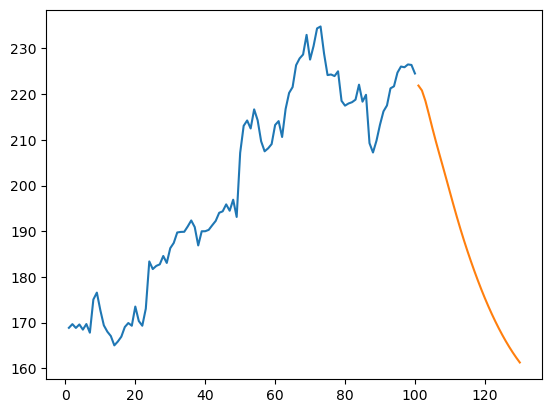

In [98]:
plt.plot(day_new,scaler.inverse_transform(df1[1068:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

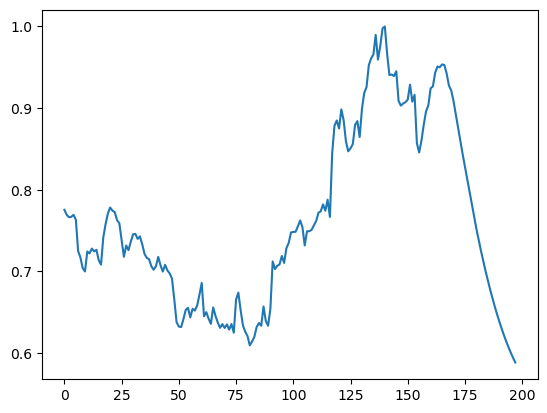

In [100]:
plt.plot(df3[1000:])